In [60]:
#https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv('stroke-data.csv')

In [62]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [64]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [65]:
df = df.dropna()
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

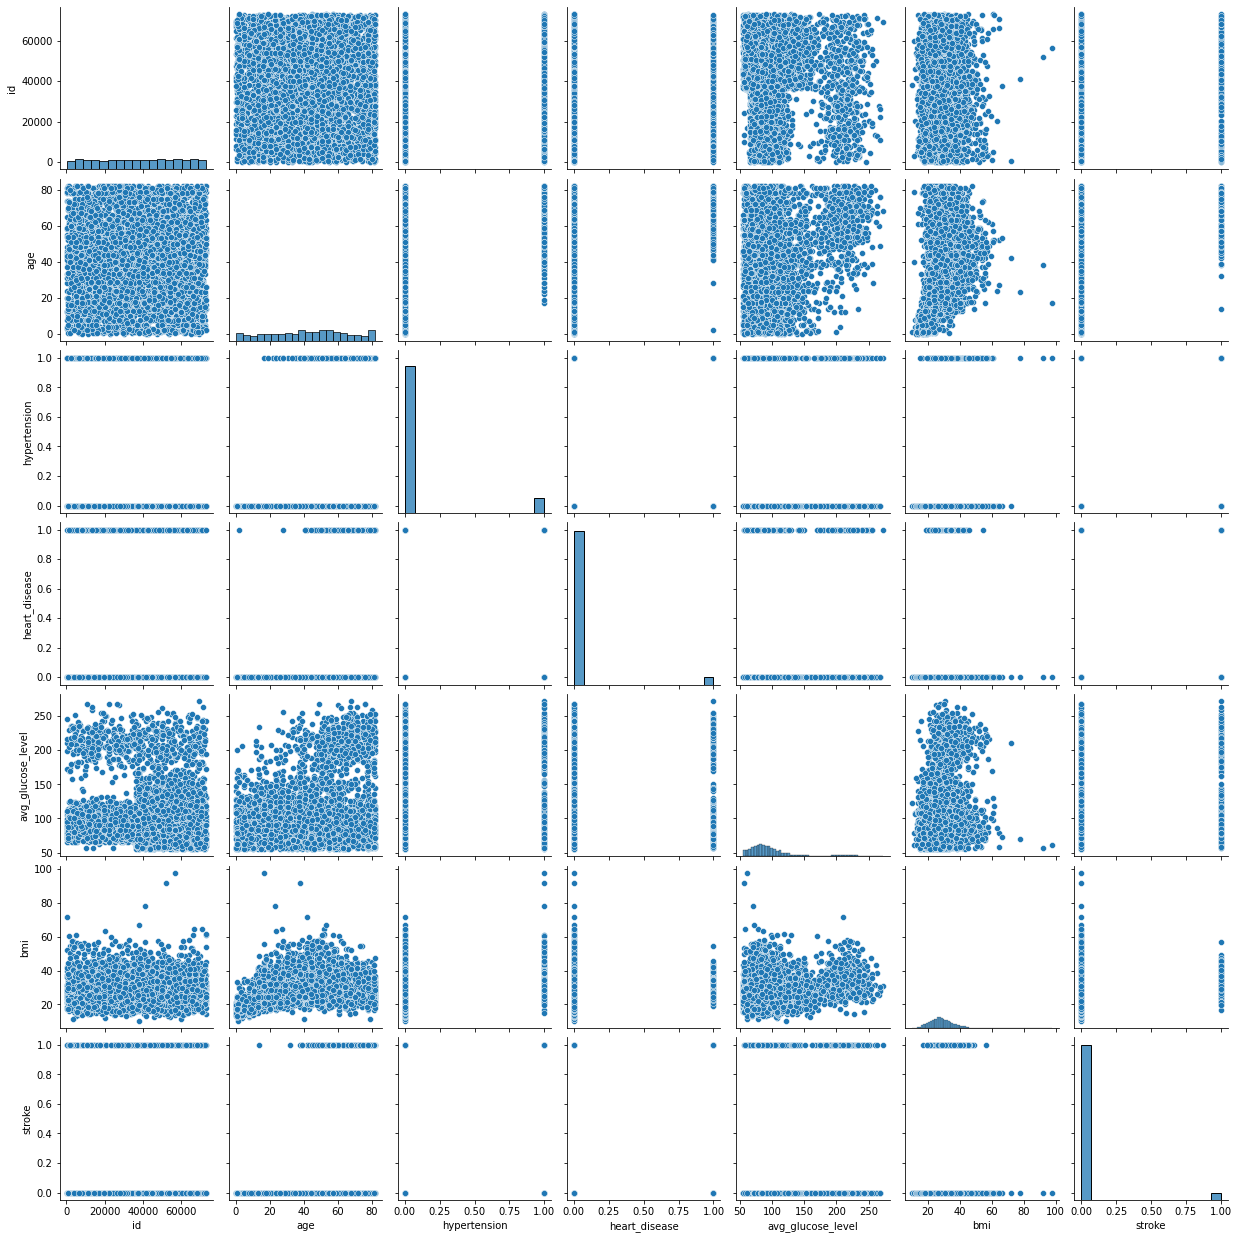

In [66]:
sns.pairplot(data=df)

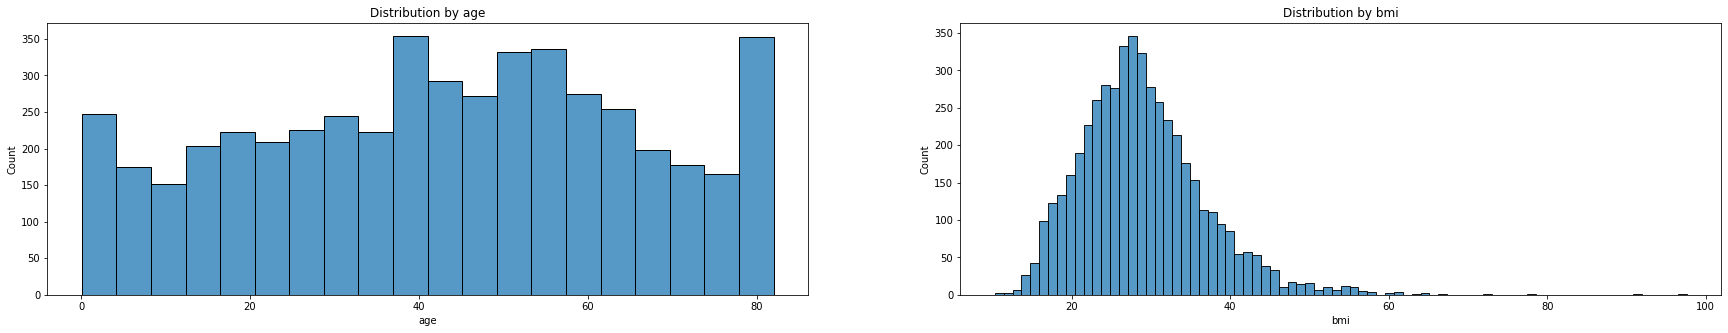

In [67]:
plt.figure(figsize=(30,5))
signs = ['age', 'bmi']

for i, sign in enumerate(signs):
    plt.subplot(1, len(signs), i+1)
    sns.histplot(data=df, x=sign, legend=True)
    plt.title(f"Distribution by {sign}")

plt.show()

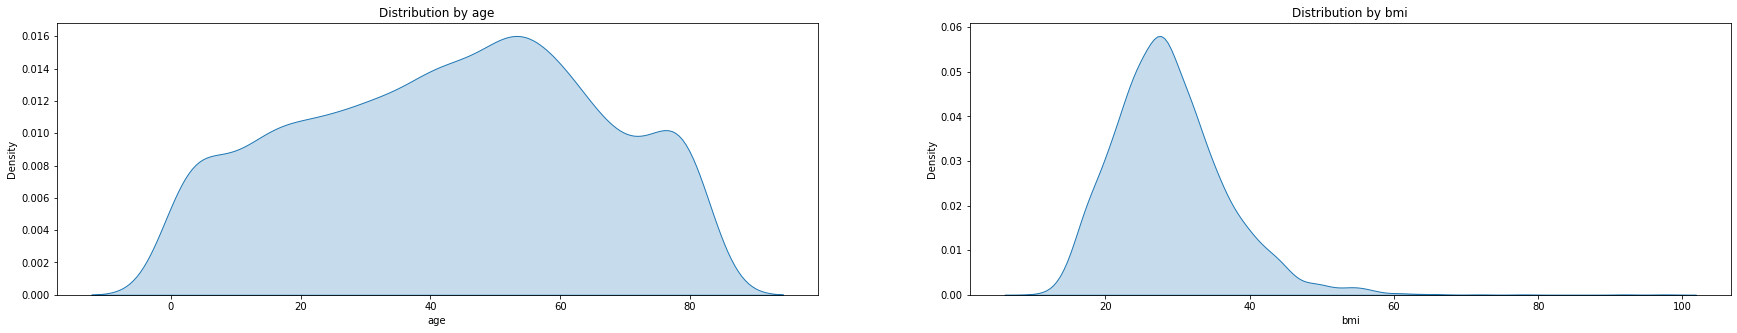

In [68]:
plt.figure(figsize=(30,5))
signs = ['age', 'bmi']

for i, sign in enumerate(signs):
    plt.subplot(1, len(signs), i+1)
    sns.kdeplot(data=df, x=sign, shade=True, legend=True)
    plt.title(f"Distribution by {sign}")

plt.show()

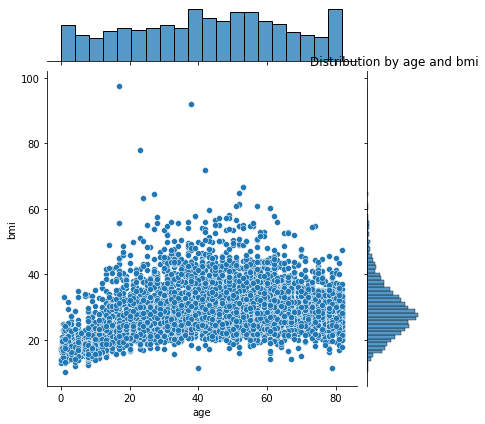

In [69]:
sns.jointplot(data=df, x=signs[0], y=signs[1], legend=True)
plt.title(f"Distribution by {signs[0]} and {signs[1]}")
plt.show()

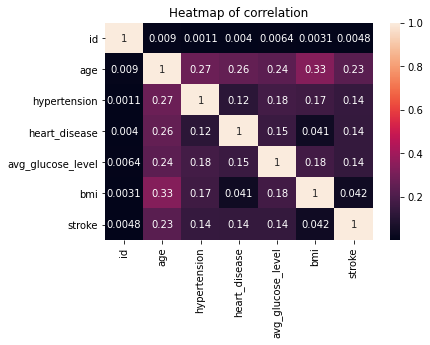

In [70]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.title(f"Heatmap of correlation")
plt.show()

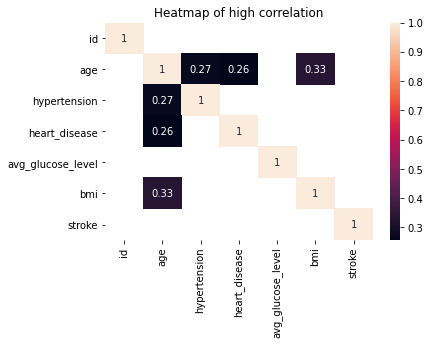

In [71]:
sns.heatmap(corr[abs(corr) > 0.25], annot=True)
plt.title(f"Heatmap of high correlation")
plt.show()

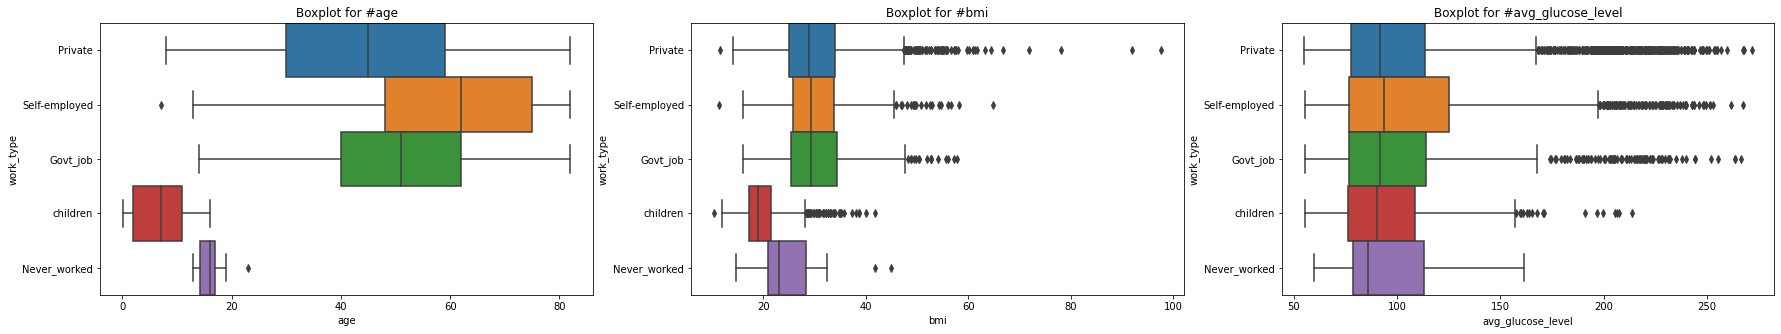

In [72]:
signs = ["age", "bmi", "avg_glucose_level"]
category = "work_type"
plt.figure(figsize=(30,5))
for i, sign in enumerate(signs):
    plt.subplot(1, 3, i+1)
    plt.title(f"Boxplot for #{sign}")
    sns.boxplot(x=sign, y=category, data=df, width=1)
plt.show()    

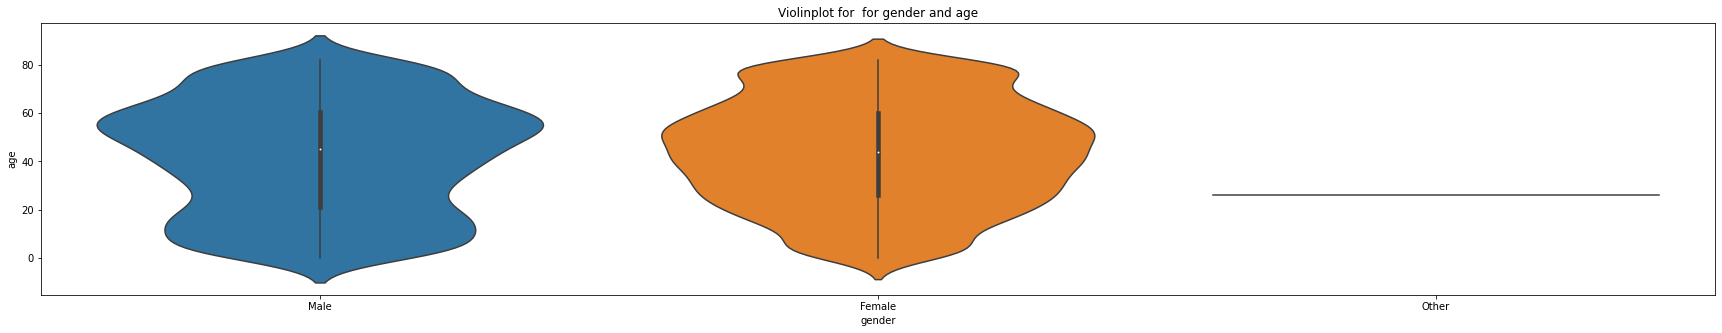

In [73]:
plt.figure(figsize=(30,5))
sign1 = 'gender'
sign2 = 'age'
sns.violinplot(x=sign1 ,y=sign2 ,data=df)
plt.title(f"Violinplot for  for {sign1} and {sign2}")
plt.show()

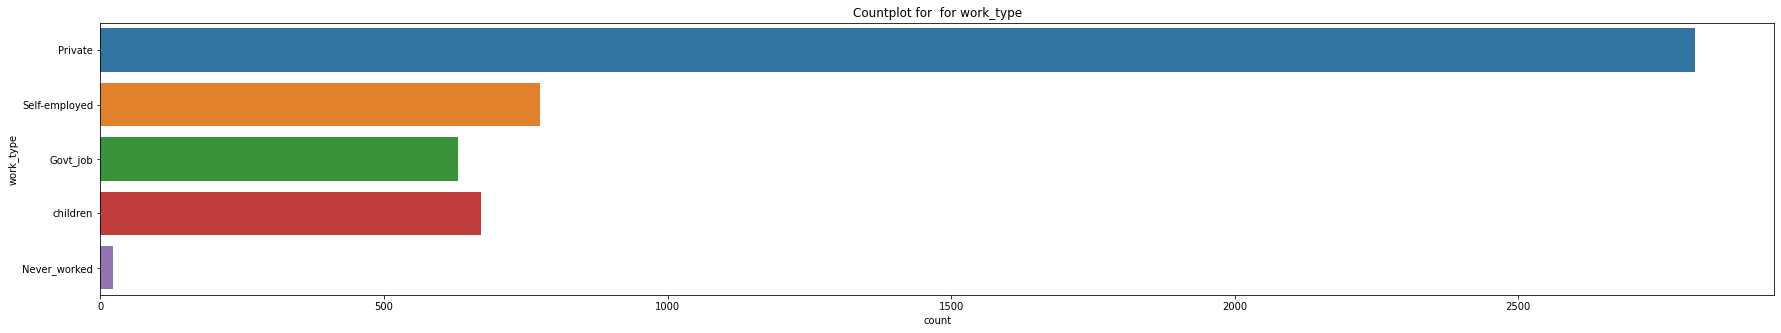

In [74]:
plt.figure(figsize=(30,5))
sign1 = 'work_type'
sns.countplot(y=df[sign1])
plt.title(f"Countplot for  for {sign1}")
plt.show()

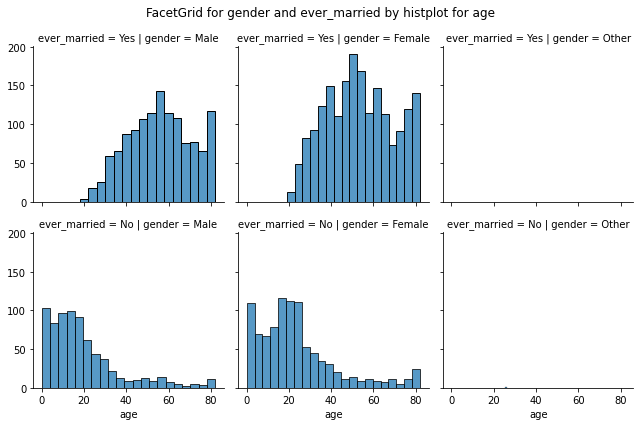

In [75]:
sign1 = 'gender'
sign2 = 'ever_married'
sign3 = 'age'
g = sns.FacetGrid(df,col=sign1,row=sign2)
g.fig.suptitle(f"FacetGrid for {sign1} and {sign2} by histplot for {sign3}")
g.map(sns.histplot, sign3)

Text(0.5, 1.0, 'Stripplot for bmi by work_type')

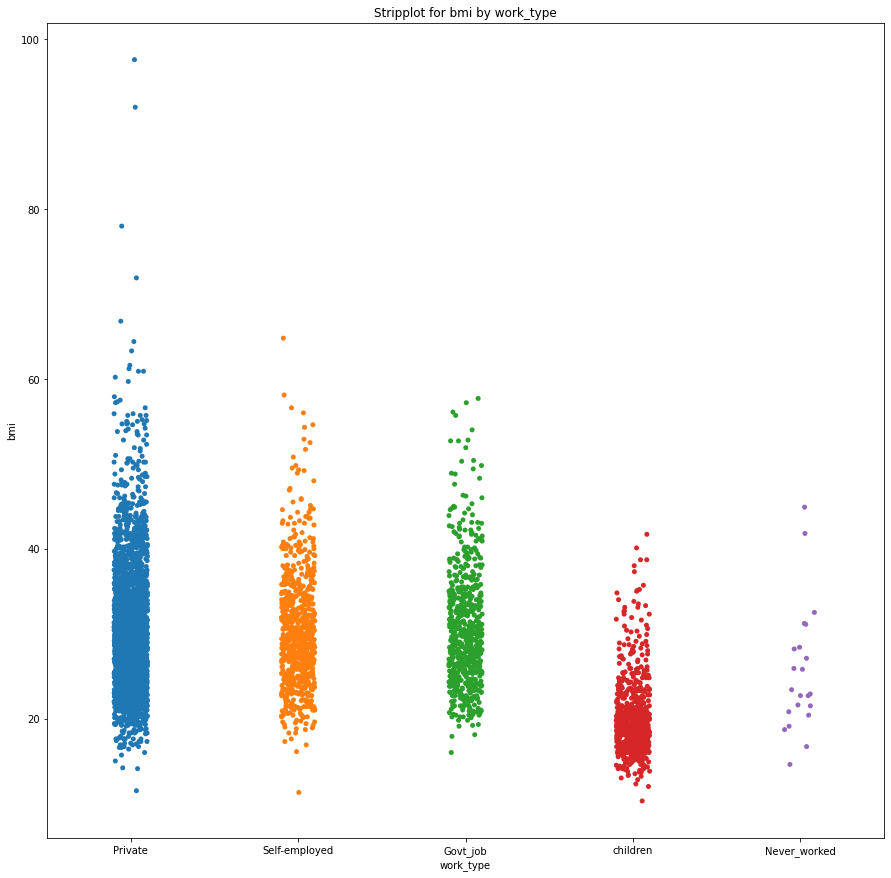

In [76]:
sign1 = "work_type"
sign2 = "bmi"
plt.figure(figsize=(15,15))
sns.stripplot(x=sign1, y=sign2, data=df)
plt.title(f"Stripplot for {sign2} by {sign1}")

/home/millfort/.local/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'swarmplot for stroke and age')

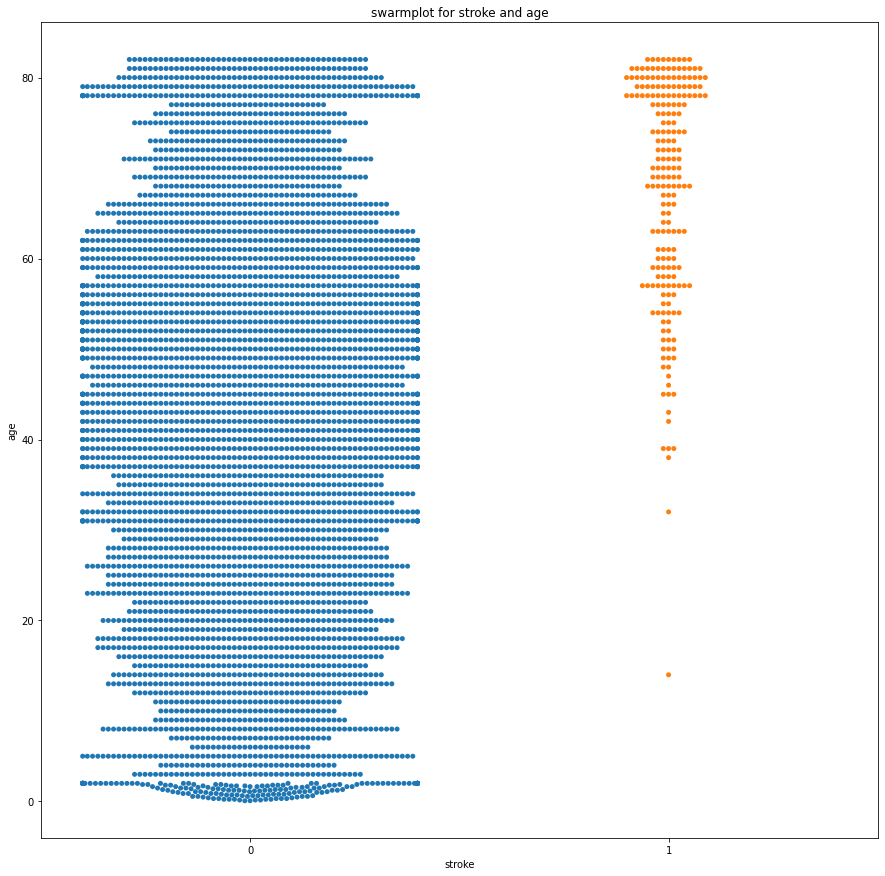

In [77]:
sign1 = 'stroke'
sign2 = 'age'
plt.figure(figsize=(15,15))
sns.swarmplot(x=sign1, y=sign2, data=df)
plt.title(f"swarmplot for {sign1} and {sign2}")

Text(0.5, 1.0, 'catplot for stroke and bmi')

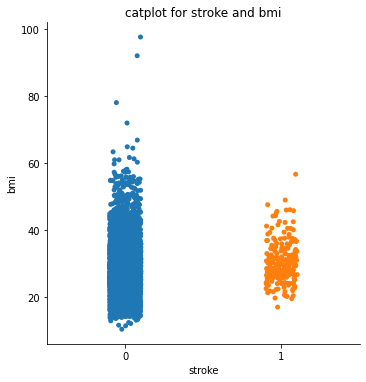

In [78]:
sign1 = 'stroke'
sign2 = 'bmi'
sns.catplot(x=sign1, y=sign2, data=df)
plt.title(f"catplot for {sign1} and {sign2}")

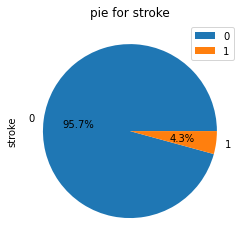

In [79]:
sign1 = 'stroke'
df[sign1].value_counts().plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.title(f"pie for {sign1}")
plt.show()